In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# CSV 파일 읽기
file_path = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/diabetes.csv"
df = pd.read_csv(file_path)

# 데이터프레임 확인
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df.drop(['BMI', 'Outcome'], axis=1) # Feature
y = df['BMI'] # 예측해야 할 컬럼

# 데이터프레임을 numpy으로 변환
X = X.values
y = pd.get_dummies(y).values
print(X)
print(y)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

[[  6.    148.     72.    ...   0.      0.627  50.   ]
 [  1.     85.     66.    ...   0.      0.351  31.   ]
 [  8.    183.     64.    ...   0.      0.672  32.   ]
 ...
 [  5.    121.     72.    ... 112.      0.245  30.   ]
 [  1.    126.     60.    ...   0.      0.349  47.   ]
 [  1.     93.     70.    ...   0.      0.315  23.   ]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [8]:
# 분할된 데이터의 shape을 출력
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 7)
(537, 248)
(231, 7)
(231, 248)


In [9]:
# 딥러닝
model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu')) # 입력층(특성 갯수 : 7개)
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1)) # 출력층 : 회귀 -> 뉴런 1개, 활성화 함수 X

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

N_EPOCHS = 10
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=32, validation_split=0.1) # 학습

# 예측
y_pred = model.predict(X_test)

/Users/jangsohyun/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - mse: 

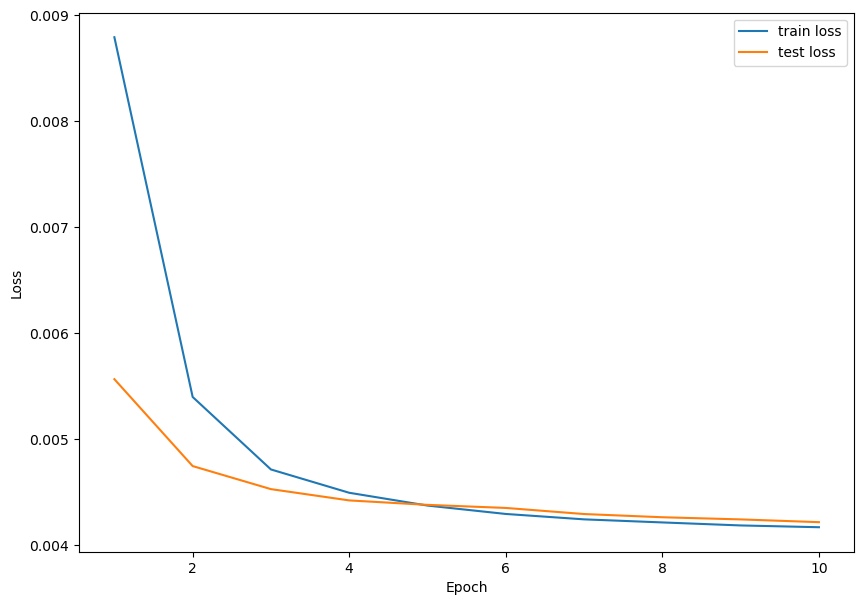



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 0.0045 - mse: 0.0045


[0.004473626147955656, 0.004473626147955656]

In [12]:
# 모델이 학습되는 동안의 손실(loss) 변화 과정을 시각화
plt.figure(figsize=(10,7))
plt.plot(range(1, N_EPOCHS + 1), history.history['loss'], label='train loss') # .history['loss'] : 훈련 데이터에 대한 loss (epoch마다 측정됨)
plt.plot(range(1, N_EPOCHS + 1), history.history['val_loss'], label='test loss') # .history['val_loss'] : 검증 데이터(validation_split로 나눈) loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 성능 평가
print("\n=====================================================\n")
model.evaluate(X_test, y_test) # loss와 metrics으로 mse 값 출력